In [24]:
import cv2
import dlib
import sys
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

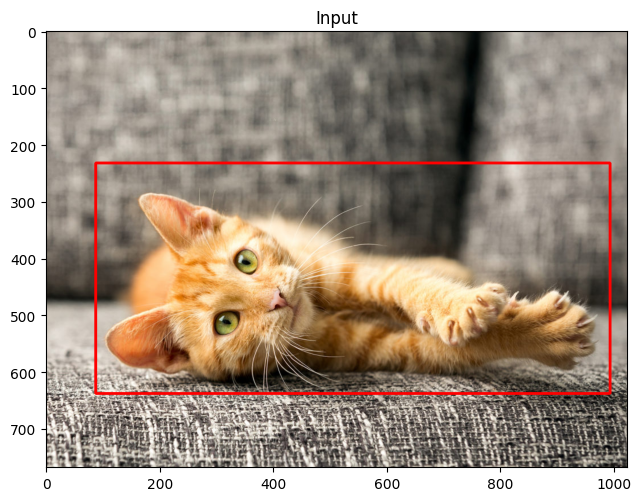

In [30]:
image = cv2.imread("images/cat2.jpg")
copy = image.copy()

mask = np.zeros(image.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

x1, y1, w, h = cv2.selectROI(image, showCrosshair=False)
cv2.destroyAllWindows()
x2 = x1 + w
y2 = y1 + h

start = (x1, y1)
end = (x2, y2)

rect = (x1, y1, w, h)

cv2.rectangle(copy, start, end, (0, 0, 255), 3)
imshow("Input", copy)

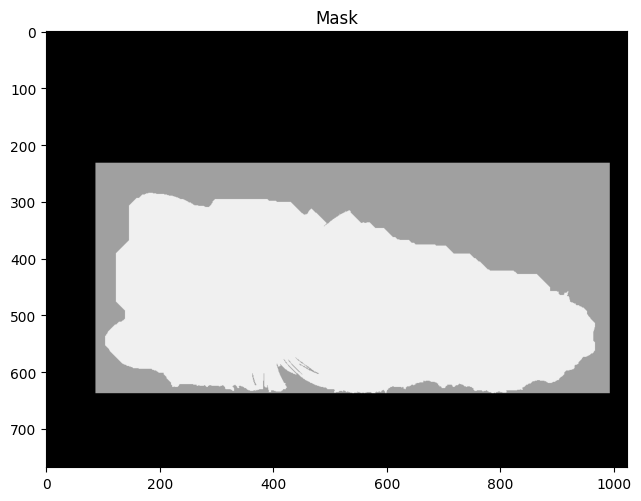

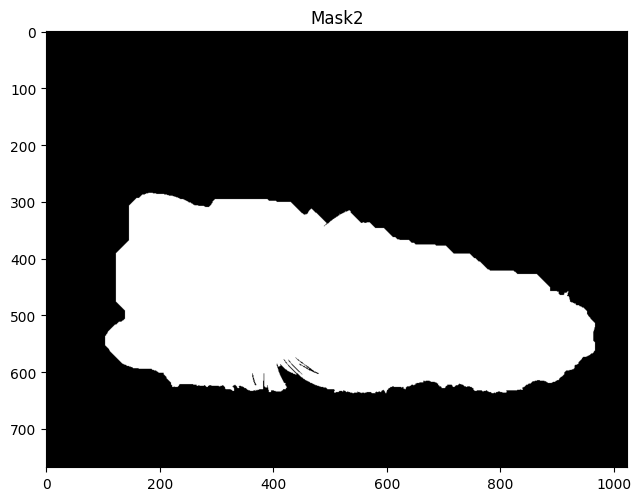

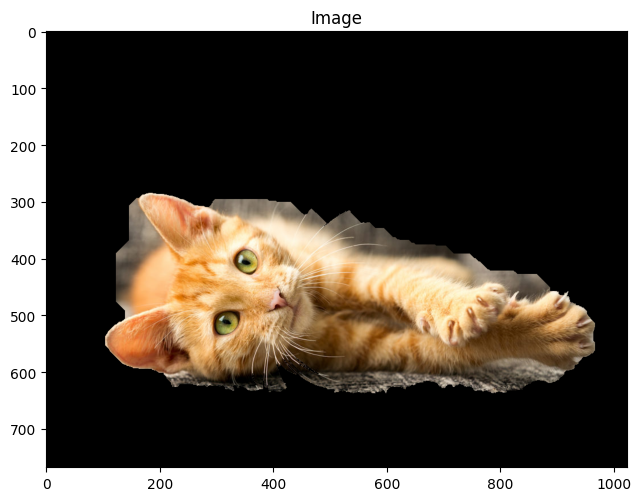

In [31]:
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0), 0, 1).astype("uint8")
image = image * mask2[:, :, np.newaxis]

imshow("Mask", mask*80)
imshow("Mask2", mask2*255)
imshow("Image", image)